In [1]:
import numpy as np
#import scipy.linalg as linalg
import numpy.linalg as linalg

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image # pip install pillow

In [2]:
img = Image.open('Lena.jpg').convert(mode='L')
X = np.array(img) # np.asarray(img)    
#plt.imshow(X, cmap='gray')
#plt.axis('off')
#plt.show()
m, n = X.shape
X.shape

(512, 512)

In [3]:
mX = np.mean(X, axis = 0) 
A = X - mX
C = np.dot(A.T, A)
#C = np.dot(A.T, A)/(m-1) # sample covariance, np.cov(A.T, ddof=1)

w, V = linalg.eigh(C)
# decending order by reverse
w = w[::-1] 
V = V[:, ::-1]
C.shape, V.shape, w.shape  

((512, 512), (512, 512), (512,))

In [4]:
# PCA projection
#A = X - mX
Y = np.dot(A, V)
Y.shape

(512, 512)

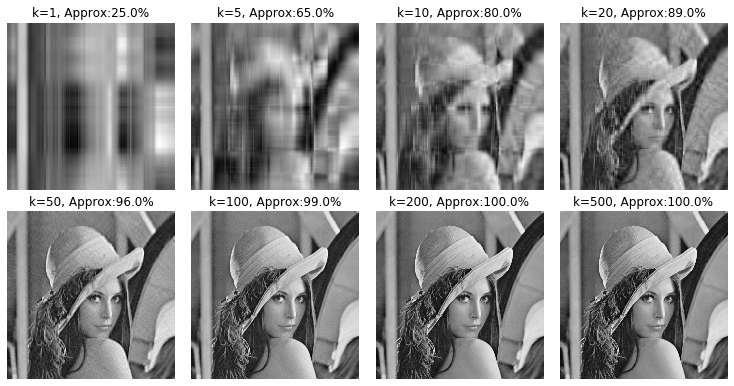

In [5]:
fig, ax = plt.subplots(2, 4, figsize=(10,5))

w[w<0] = 0 # w> 0 but numerically, it will be < 0
K = [1, 5, 10, 20, 50, 100, 200, 500]
for i, k in enumerate(K):  # approximation back projection
    ratio = np.sum(w[:k])/np.sum(w)
    Vk = V.copy()
    
    Vk[:, k:] = 0
    Xk = np.dot(Y, Vk.T) + mX # PCA backprojection

#    Xk = Xk.astype('uint8')
        
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].imshow(Xk, cmap='gray')
    ax[i//4, i%4].set_title("k={}, Approx:{}%".format(k, round(ratio*100)))

fig.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, 
                   hspace = 0.1, wspace = 0.1)